##データの取り込み

In [1]:
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic",style="white")
pd.set_option('display.max_columns', 150)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2f6c2eb3e1dbced39a2730ef5dd4774052871b7dac681f3660bcef561a33b48f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
df_master = pd.read_csv("/content/drive/MyDrive/data/patient_assessment_data.csv")
df_master.head()

,index,frail,gender,age,hospitalization_one_year,ortho_hypotension,vision,audition,balance_single,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
0,0,Pre-frail,M,78,0,No,Sees moderately,Hears moderately,>5 sec,8.80,24.095500,29,2
1,1,Pre-frail,M,79,0,No,Sees moderately,Hears moderately,>5 sec,6.20,24.205693,30,2
2,2,Pre-frail,M,79,0,No,Sees moderately,Hears moderately,>5 sec,7.20,24.576145,28,2
3,3,Pre-frail,M,80,0,No,Sees moderately,Hears moderately,>5 sec,6.45,24.836407,26,3
4,4,Non frail,F,72,1,No,Sees well,Hears well,>5 sec,4.70,23.437500,25,2


##データ探索(EDA)

In [3]:
#データのサマリ
display(df_master.info())
display(df_master.describe())
display(df_master.describe(include="object"))

#クラスター作成に使うデータは12種類
#基本情報や既往歴、身体状況、認知面などさまざまな因子が存在する
#欠損はなし

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     117 non-null    int64  
 1   frail                     117 non-null    object 
 2   gender                    117 non-null    object 
 3   age                       117 non-null    int64  
 4   hospitalization_one_year  117 non-null    int64  
 5   ortho_hypotension         117 non-null    object 
 6   vision                    117 non-null    object 
 7   audition                  117 non-null    object 
 8   balance_single            117 non-null    object 
 9   gait_speed_4m             117 non-null    float64
 10  bmi_score                 117 non-null    float64
 11  mmse_total_score          117 non-null    int64  
 12  depression_total_score    117 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 12.0+ KB


None

,index,age,hospitalization_one_year,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,76.726496,0.239316,6.619915,28.664850,28.068376,2.256410
std,33.919021,3.478069,0.582053,3.556938,5.187214,1.512742,2.009262
min,0.000000,70.000000,0.000000,2.540000,22.479339,24.000000,0.000000
25%,29.000000,74.000000,0.000000,4.570000,24.744350,27.000000,0.000000
50%,58.000000,77.000000,0.000000,5.600000,27.168115,28.000000,2.000000
75%,87.000000,79.000000,0.000000,7.300000,29.788797,29.000000,4.000000
max,116.000000,85.000000,3.000000,22.800000,44.658044,30.000000,8.000000


,frail,gender,ortho_hypotension,vision,audition,balance_single
count,117,117,117,117,117,117
unique,3,2,2,3,2,3
top,Pre-frail,M,No,Sees well,Hears well,>5 sec
freq,48,67,112,78,89,66


frail
Frail        28
Non frail    41
Pre-frail    48
Name: index, dtype: int64

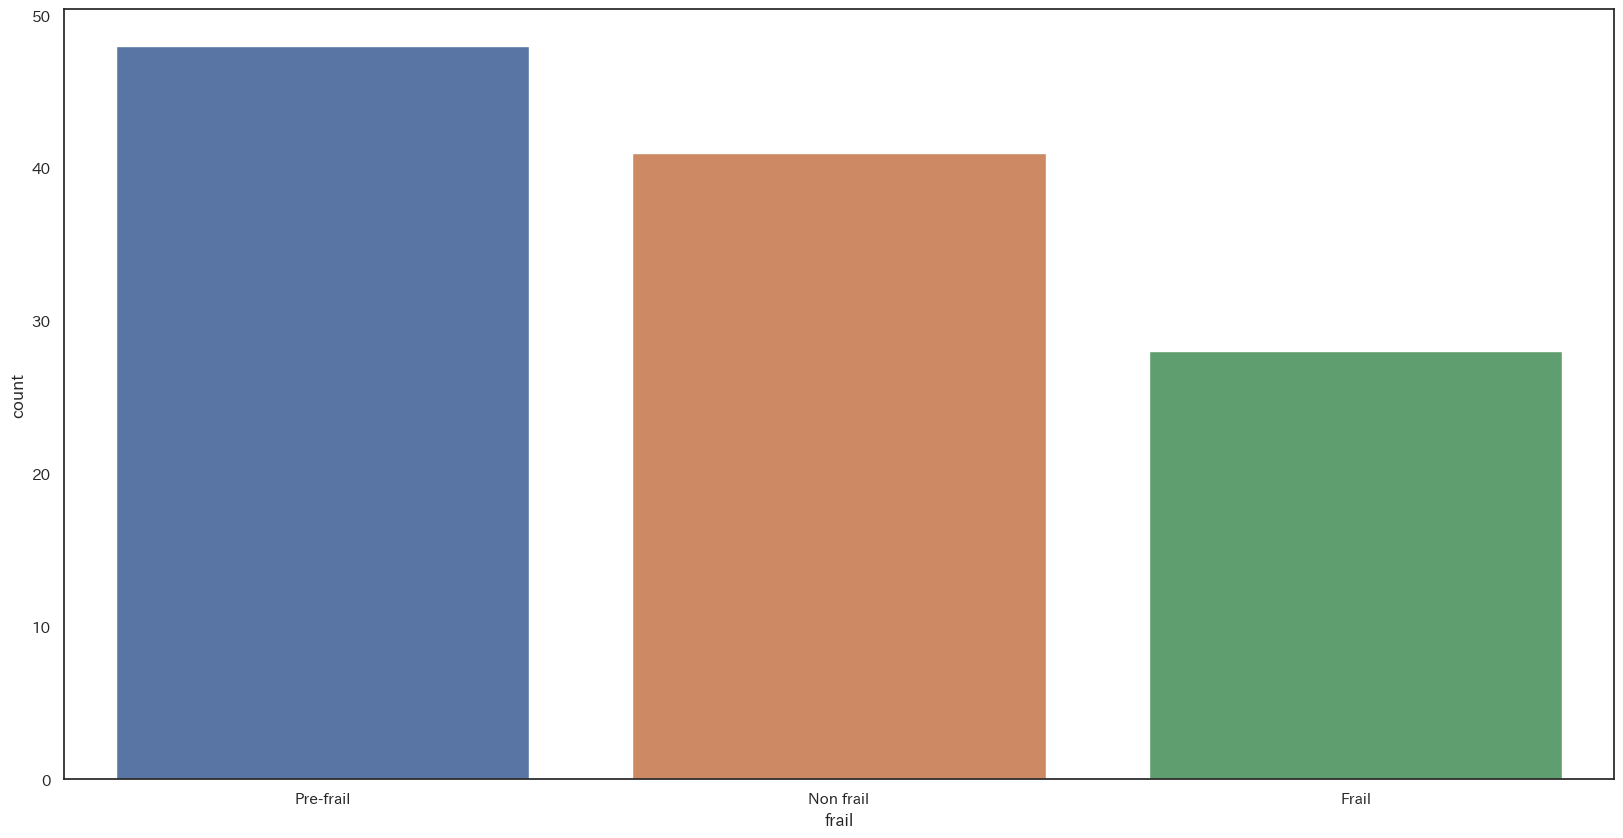

In [4]:
#frail
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="frail", data=df_master)
df_master.groupby("frail").count()["index"]


#明らかな虚弱者は少なく、少し虚弱or虚弱じゃない人が多い様子
#Frail=2, Pre-frail=1, Non frail=0で順序尺度に変換できそう

gender
F    50
M    67
Name: index, dtype: int64

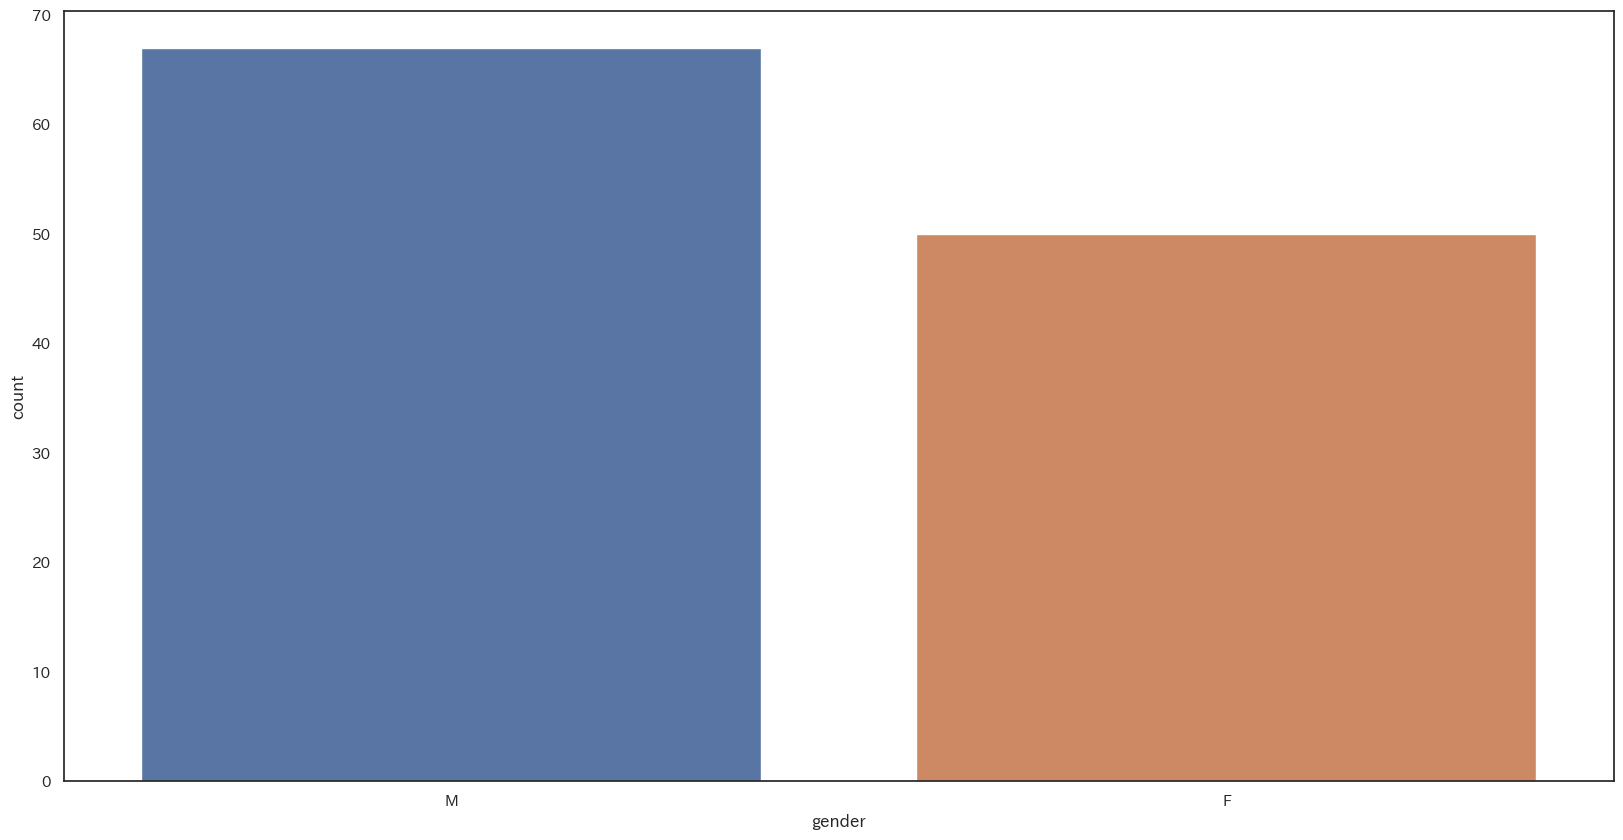

In [5]:
#gender
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="gender", data=df_master)
df_master.groupby("gender").count()["index"]

#やや男性が多い
#M=1,F=0にダミー変換

<ipython-input-6-ecbe3967cf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_master["age"])


count    117.000000
mean      76.726496
std        3.478069
min       70.000000
25%       74.000000
50%       77.000000
75%       79.000000
max       85.000000
Name: age, dtype: float64

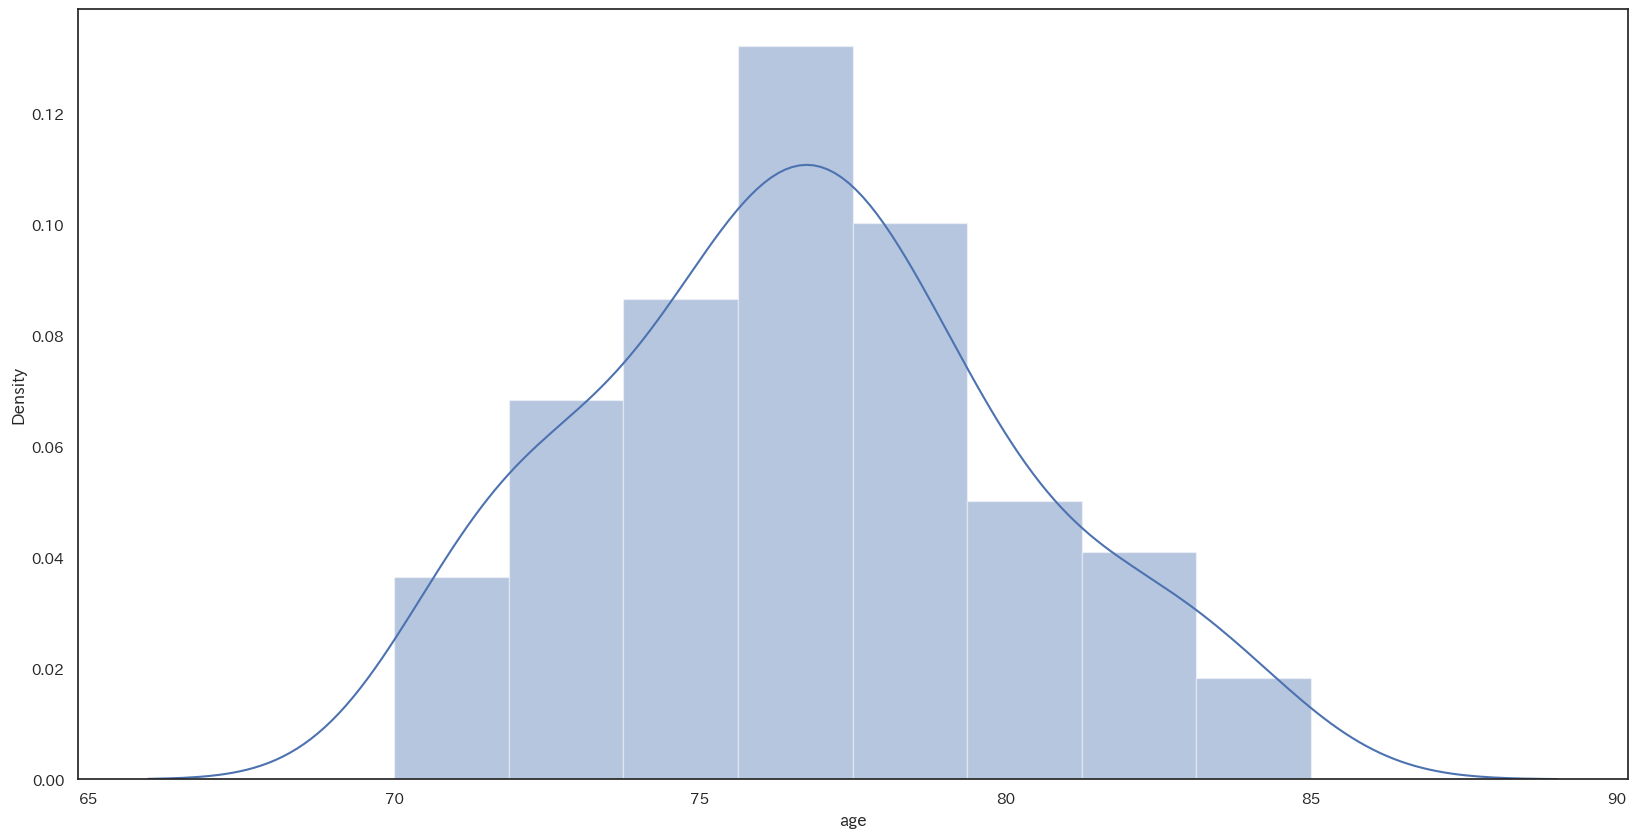

In [6]:
#age
fig = plt.subplots(figsize=(20,10))
sns.distplot(df_master["age"])
df_master["age"].describe()

#70歳以上のみのデータの様子、平均年齢77歳で正規分布している

hospitalization_one_year
0    95
1    19
3     3
Name: index, dtype: int64

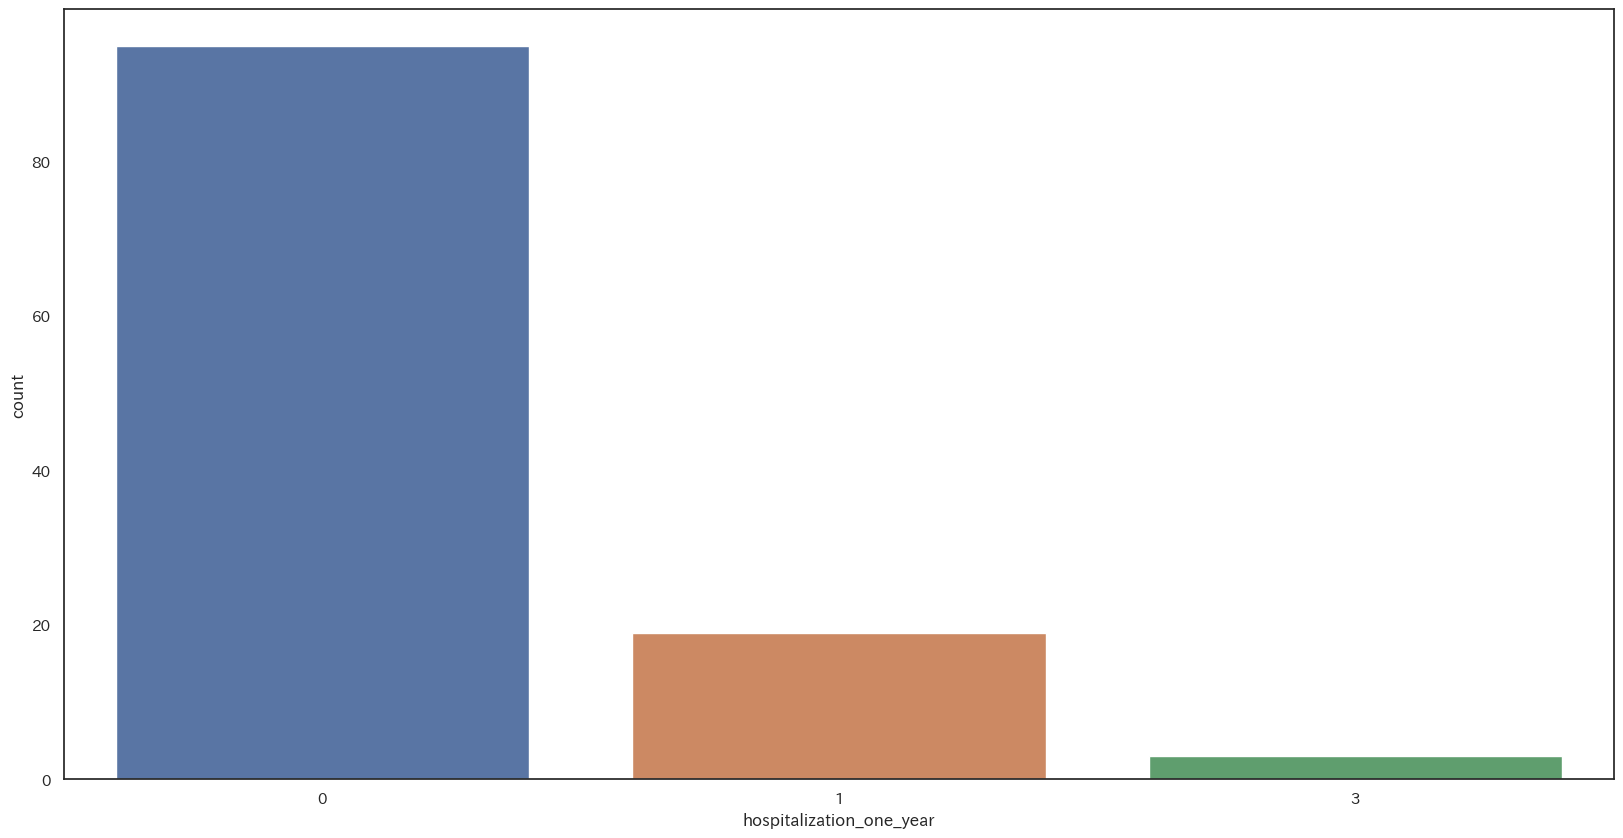

In [7]:
#hospitalization_one_year
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="hospitalization_one_year", data=df_master)
df_master.groupby("hospitalization_one_year").count()["index"]

#3回の人が3人いるが、ほとんど0回
#入院歴の有無で2値のダミー変換をしても良さそうだが、今回はとりあえずそのまま使うことにする

ortho_hypotension
No     112
Yes      5
Name: index, dtype: int64

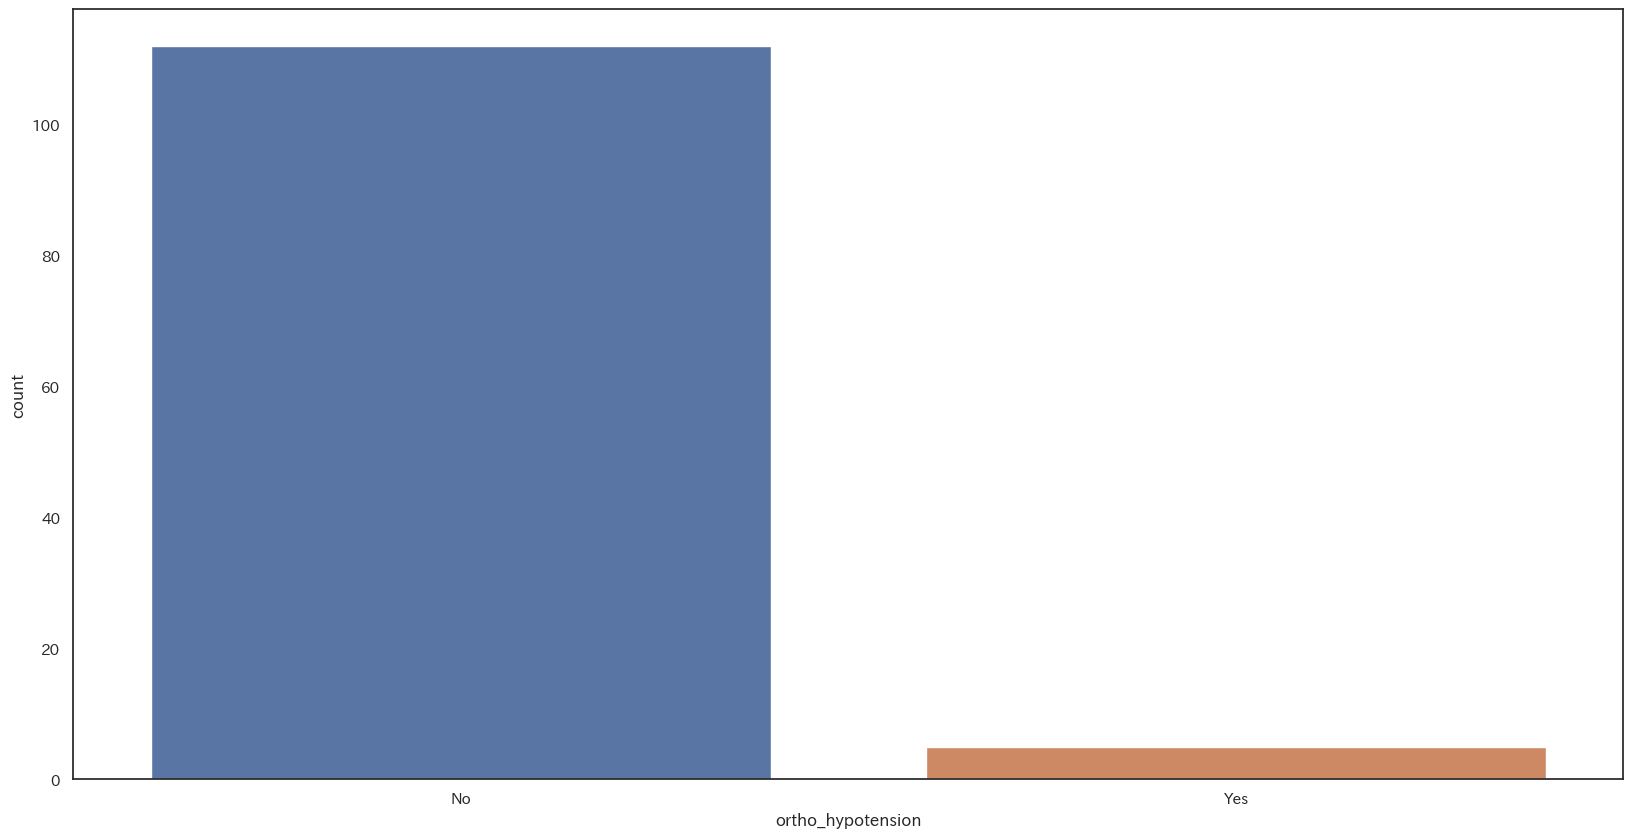

In [8]:
#ortho_hypotension
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="ortho_hypotension", data=df_master)
df_master.groupby("ortho_hypotension").count()["index"]

#ほぼなし
#省いてもいいが、一応残しておく(Yes=1でダミー変換)

vision
Sees moderately    31
Sees poorly         8
Sees well          78
Name: index, dtype: int64

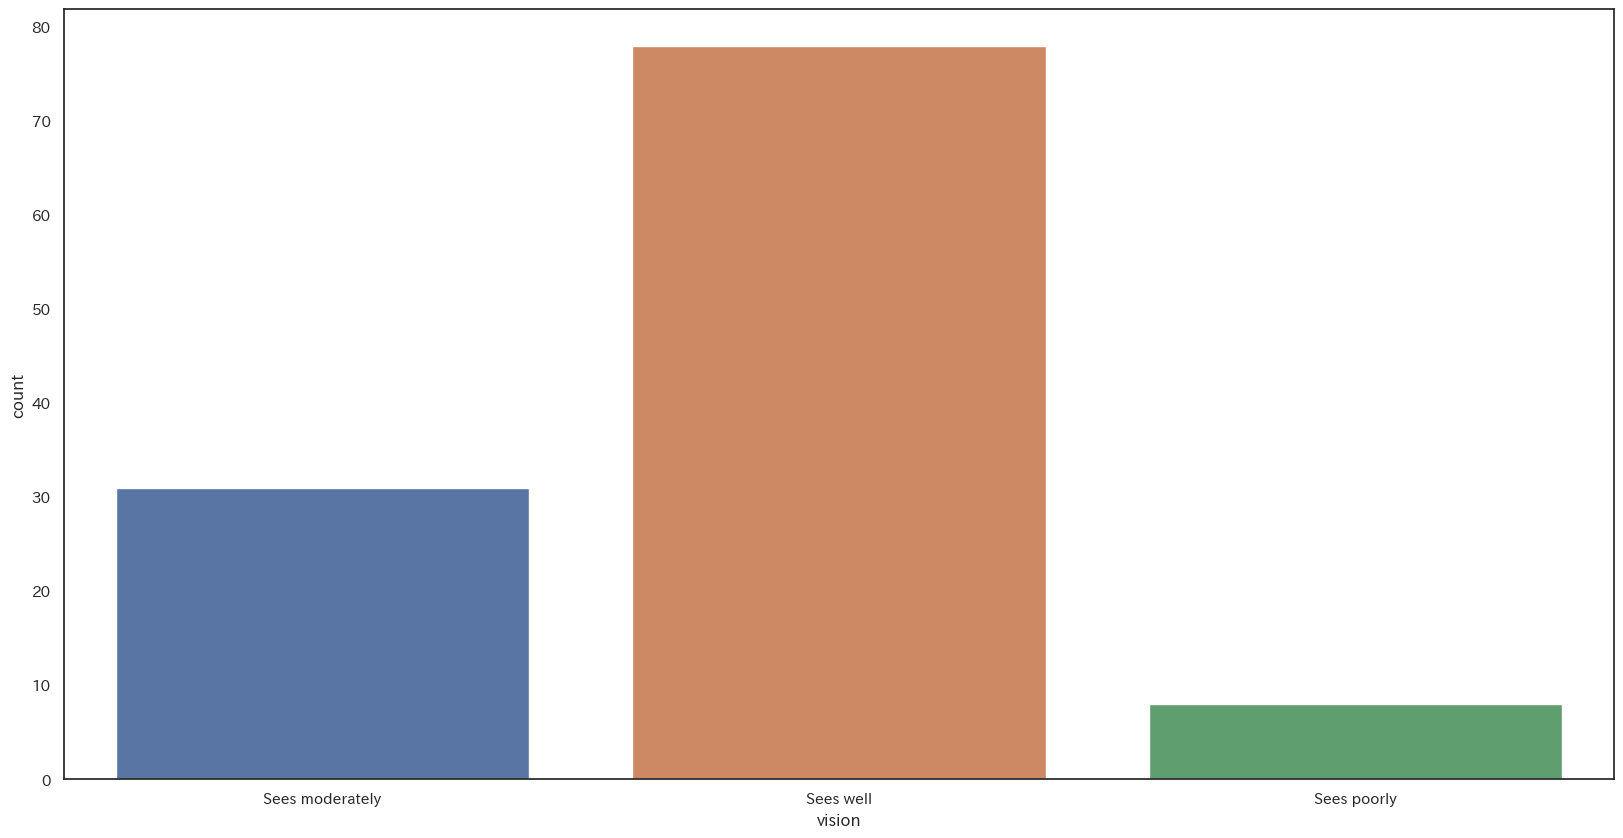

In [9]:
#vision
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="vision", data=df_master)
df_master.groupby("vision").count()["index"]

#基本的に視力がいい人が多い
#Sees well=2, Sees moderately=1, Sees poorly=0で順序尺度に変換できそう

audition
Hears moderately    28
Hears well          89
Name: index, dtype: int64

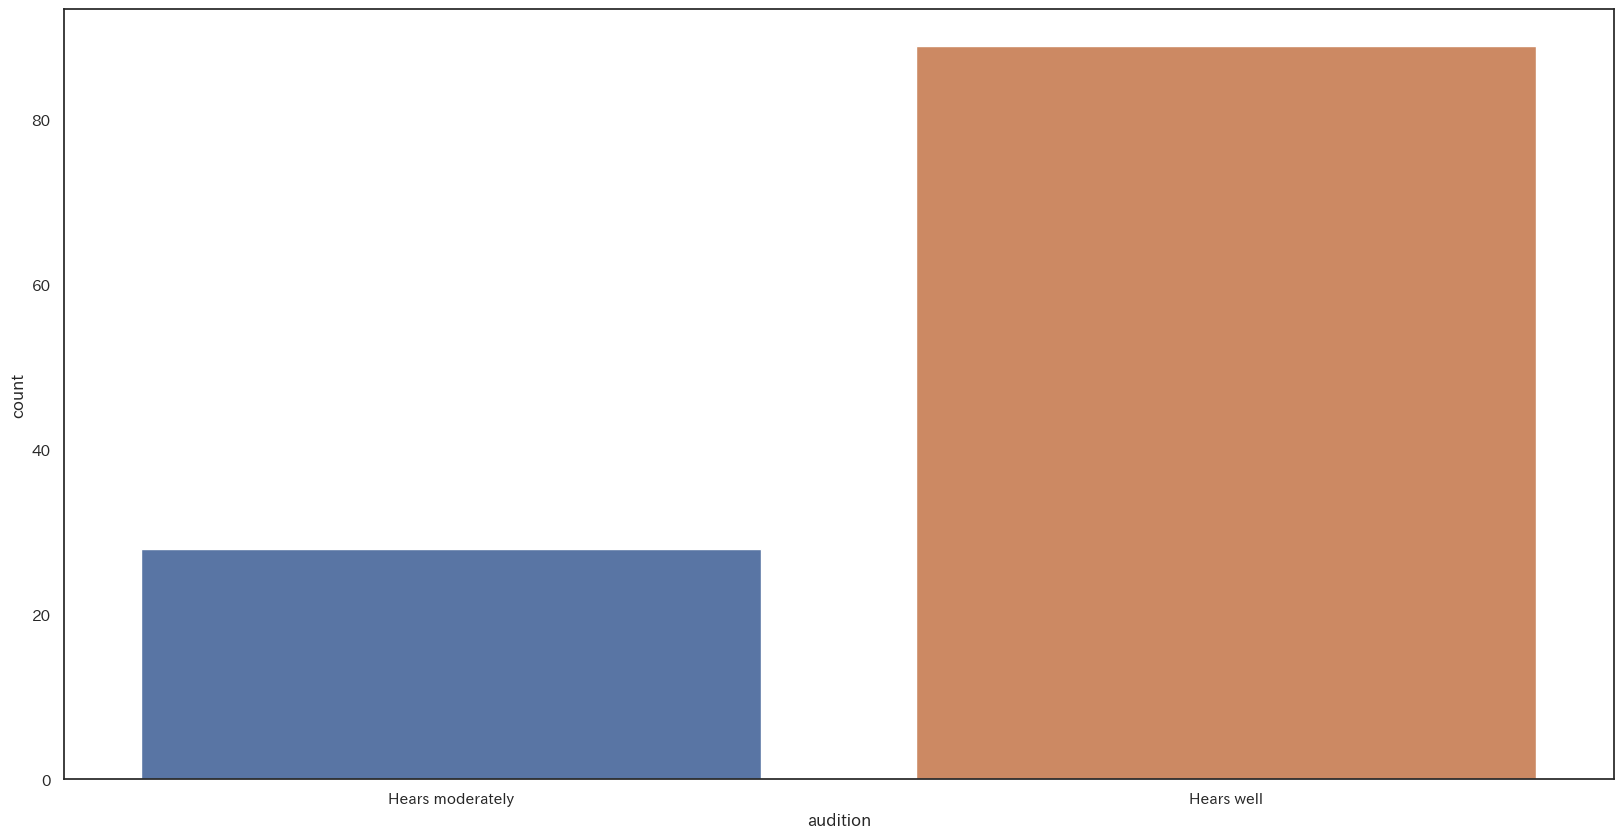

In [10]:
#audition
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="audition", data=df_master)
df_master.groupby("audition").count()["index"]

#聴力も基本的に良い人が多い
#Hears well=1, Hears moderately=0で順序尺度に変換できそう

balance_single
<5 sec                 40
>5 sec                 66
test non realizable    11
Name: index, dtype: int64

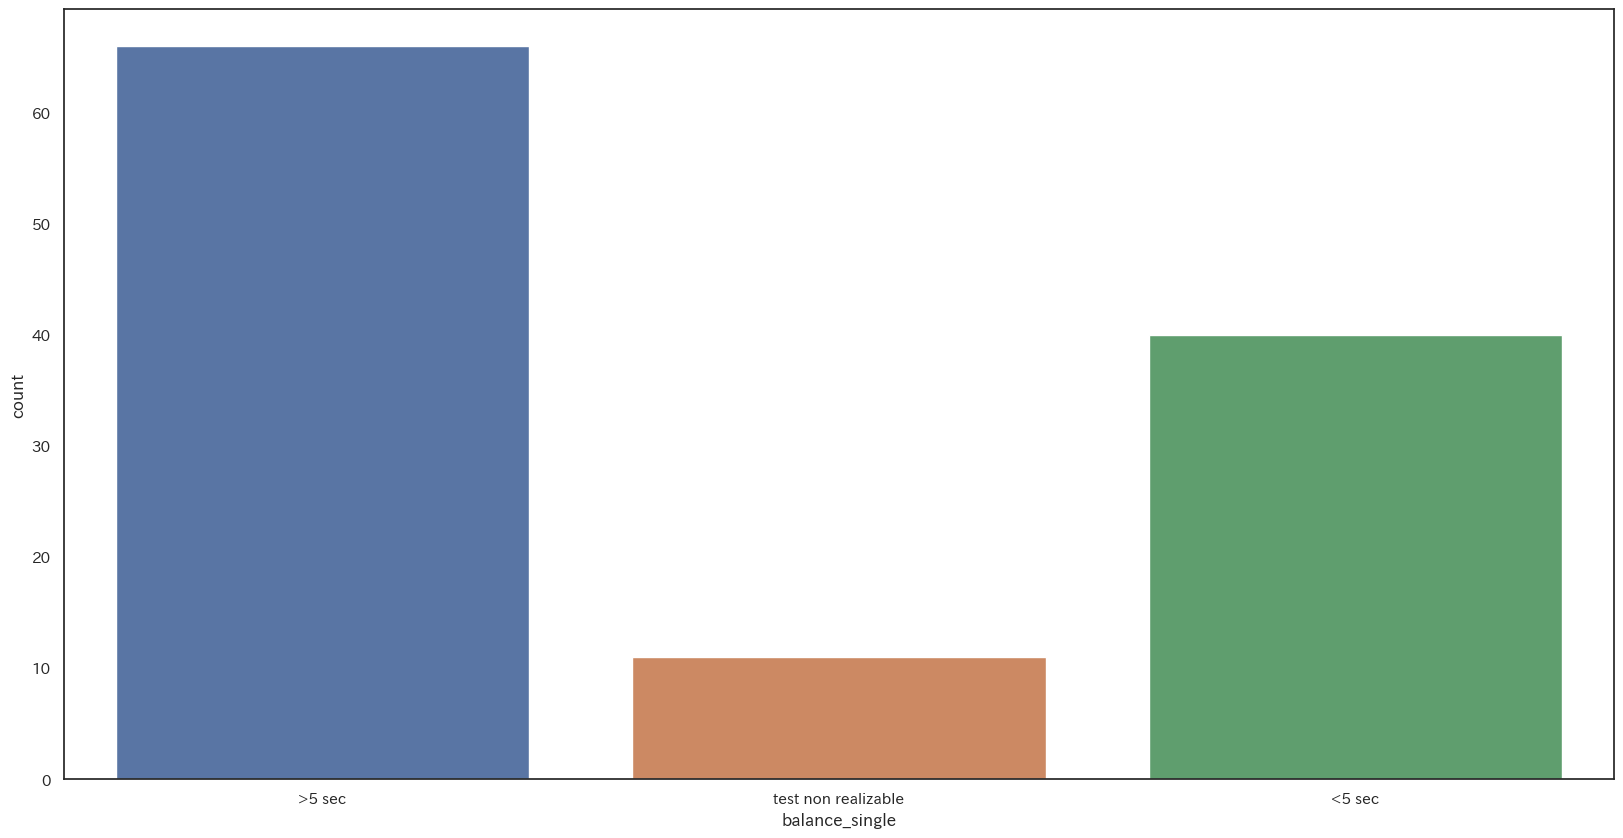

In [11]:
#balance_single
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="balance_single", data=df_master)
df_master.groupby("balance_single").count()["index"]

#testできないということはそれくらい身体機能が低いということ
#>5 sec=2, <5 sec=1, test non realizable=0で順序尺度に変換できそう

<ipython-input-12-1657c09468e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_master["gait_speed_4m"])


count    117.000000
mean       6.619915
std        3.556938
min        2.540000
25%        4.570000
50%        5.600000
75%        7.300000
max       22.800000
Name: gait_speed_4m, dtype: float64

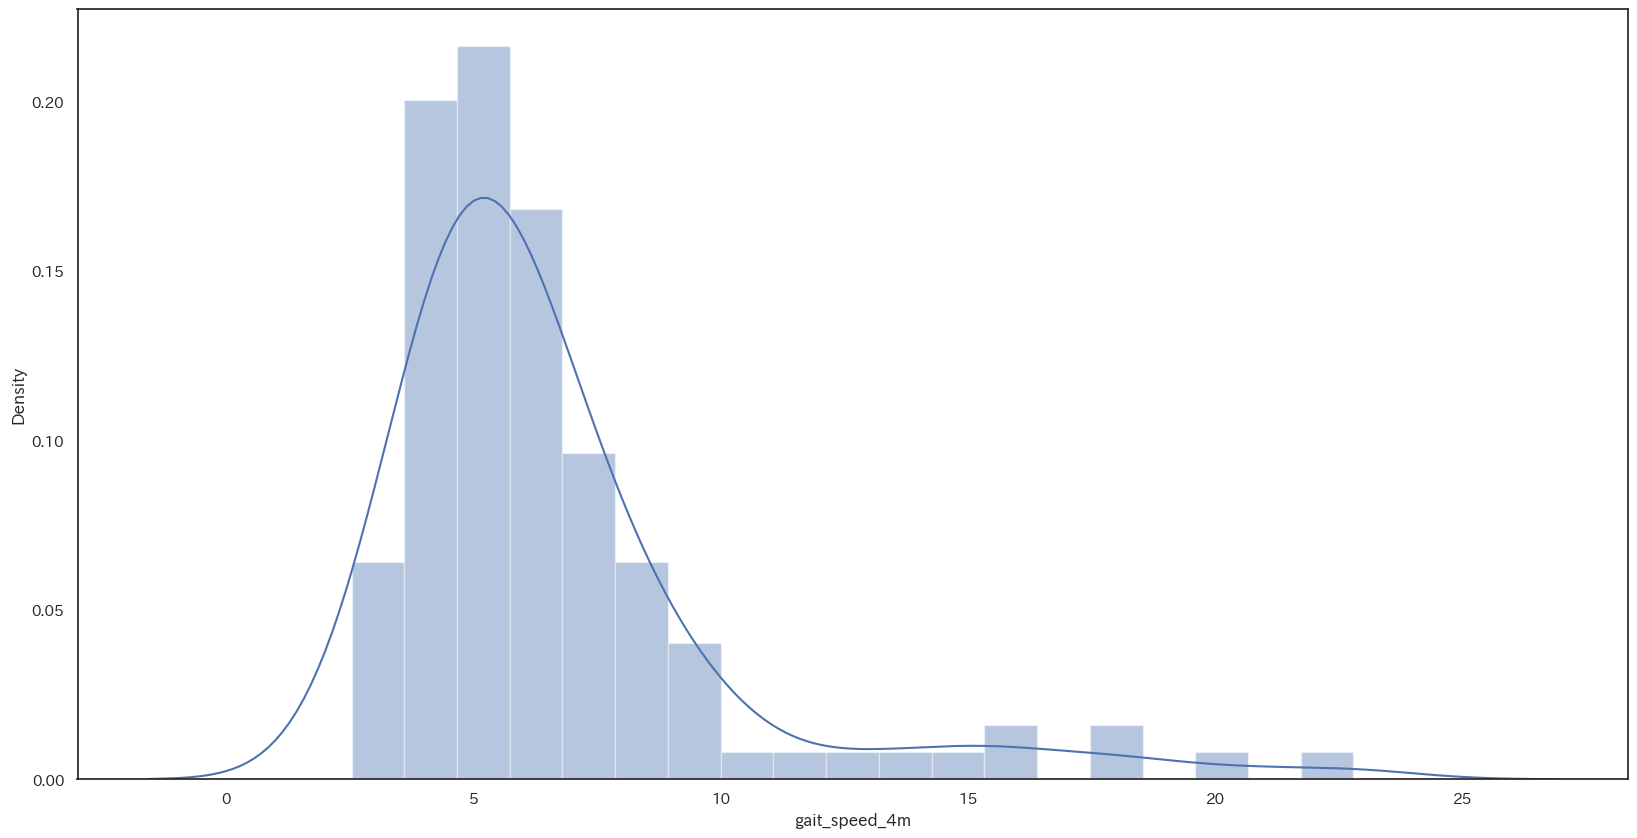

In [12]:
#gait_speed_4m
fig = plt.subplots(figsize=(20,10))
sns.distplot(df_master["gait_speed_4m"])
df_master["gait_speed_4m"].describe()

#外れ値があるが、基本は正規分布
#対数変換をして外れ値の影響を減らすことを検討

<ipython-input-13-c5c397bbd1c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_master["gait_speed_4m"]))


<Axes: xlabel='gait_speed_4m', ylabel='Density'>

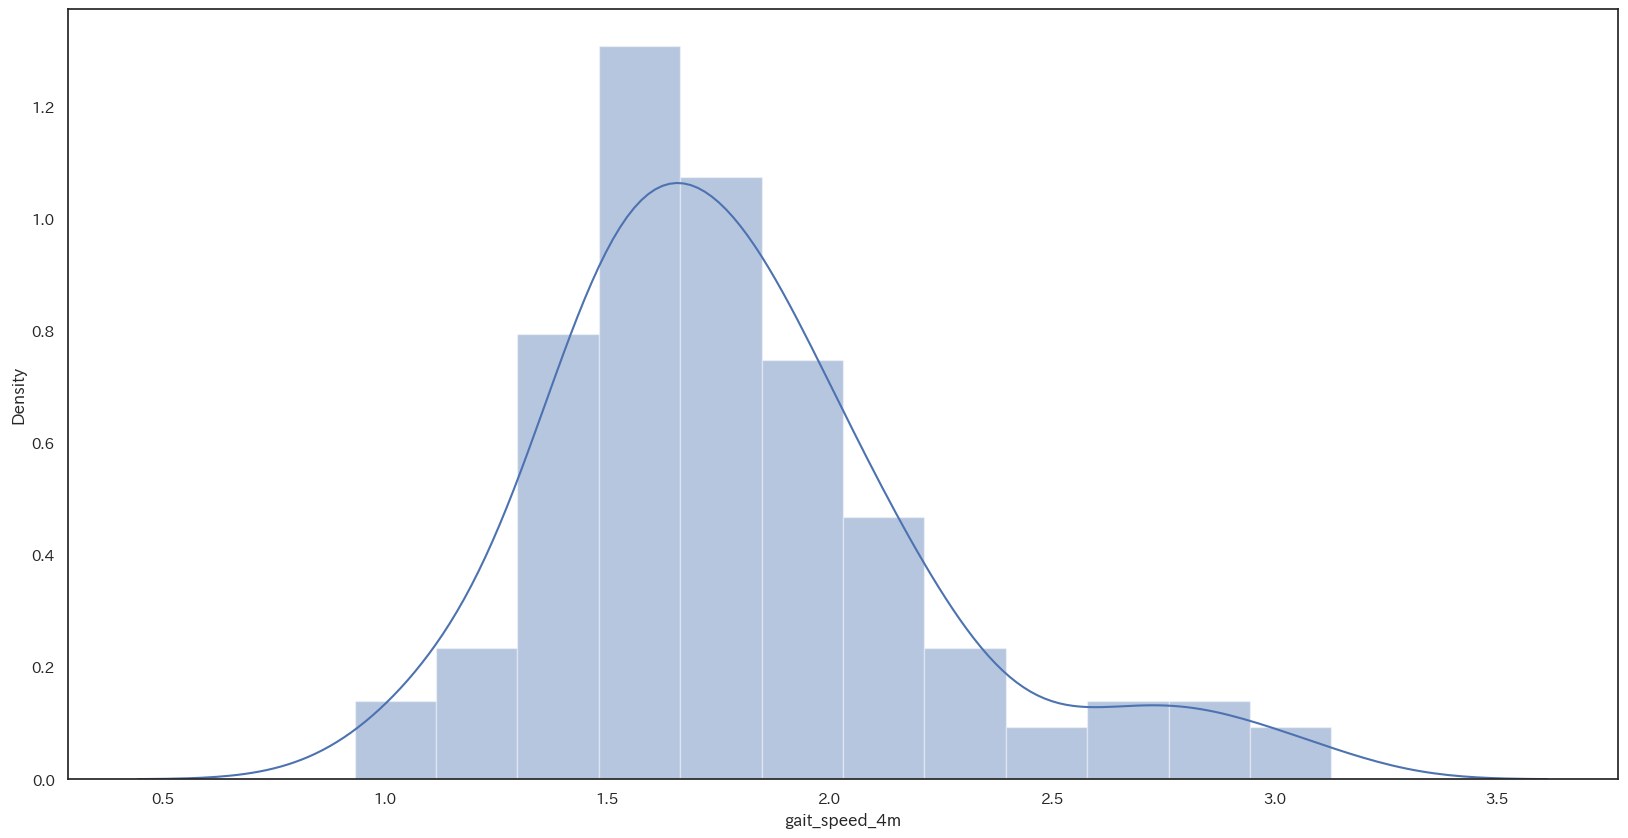

In [13]:
#対数変換後gait_speed
fig = plt.subplots(figsize=(20,10))
sns.distplot(np.log(df_master["gait_speed_4m"]))

<ipython-input-14-2dc5d3db867c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_master["bmi_score"])


count    117.000000
mean      28.664850
std        5.187214
min       22.479339
25%       24.744350
50%       27.168115
75%       29.788797
max       44.658044
Name: bmi_score, dtype: float64

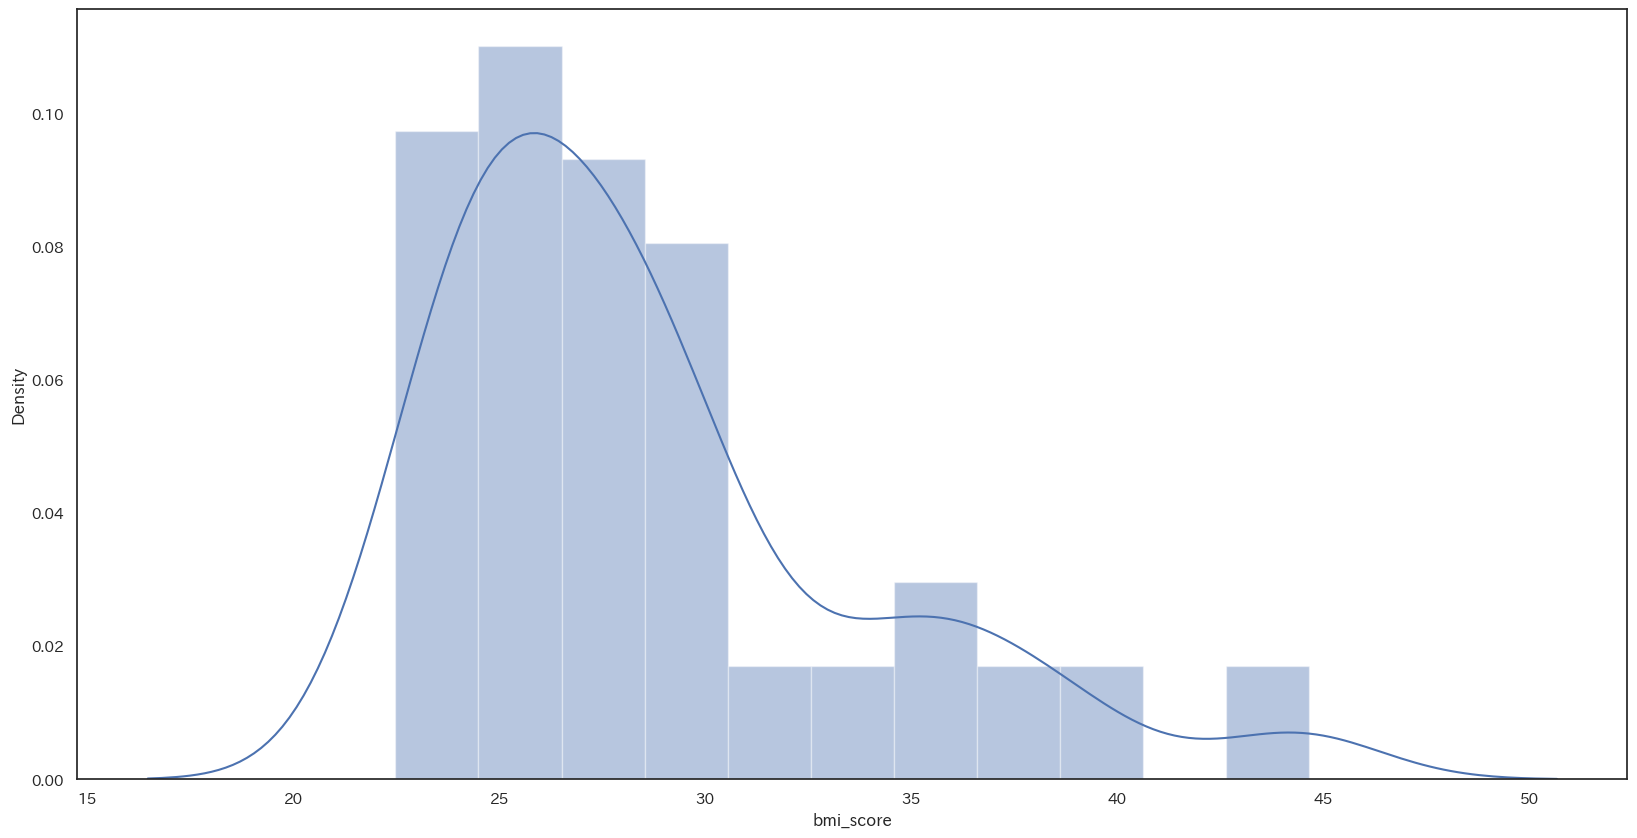

In [14]:
#bmi_score
fig = plt.subplots(figsize=(20,10))
sns.distplot(df_master["bmi_score"])
df_master["bmi_score"].describe()

#全体的に太り気味の人が多い印象、外れ値もある
#学会基準に従い、bmi<25 =0(正常), bmi>=25 =1(肥満1度), bmi>=30 =2(肥満2度) , bmi>=35 =2(肥満3度), bmi>=40 =4(肥満4度)の順序尺度に変換

<ipython-input-15-302cb1e01adc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_master["mmse_total_score"])


count    117.000000
mean      28.068376
std        1.512742
min       24.000000
25%       27.000000
50%       28.000000
75%       29.000000
max       30.000000
Name: mmse_total_score, dtype: float64

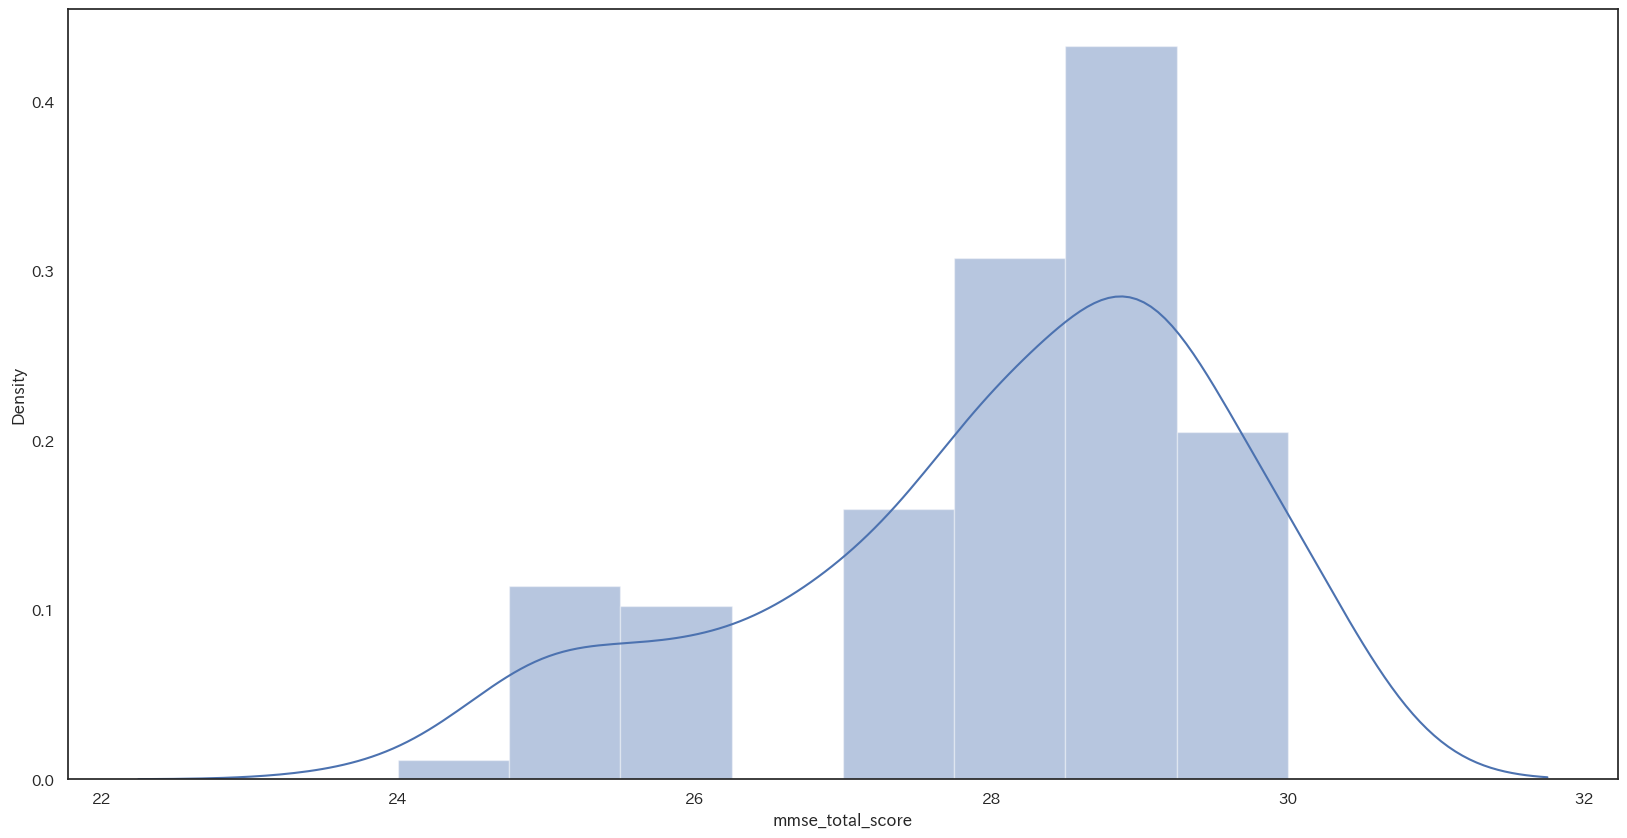

In [15]:
#mmse_total_score
fig = plt.subplots(figsize=(20,10))
sns.distplot(df_master["mmse_total_score"])
df_master["mmse_total_score"].describe()

#MMSEは24点以上なら認知症無しと判定される
#ほぼ全員が認知機能良好なため、あまり重要な特徴量ではなさそう
#特徴量から省いてもいいが、一応そのまま使うことにする

<ipython-input-16-65f86b1787d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_master["depression_total_score"])


count    117.000000
mean       2.256410
std        2.009262
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: depression_total_score, dtype: float64

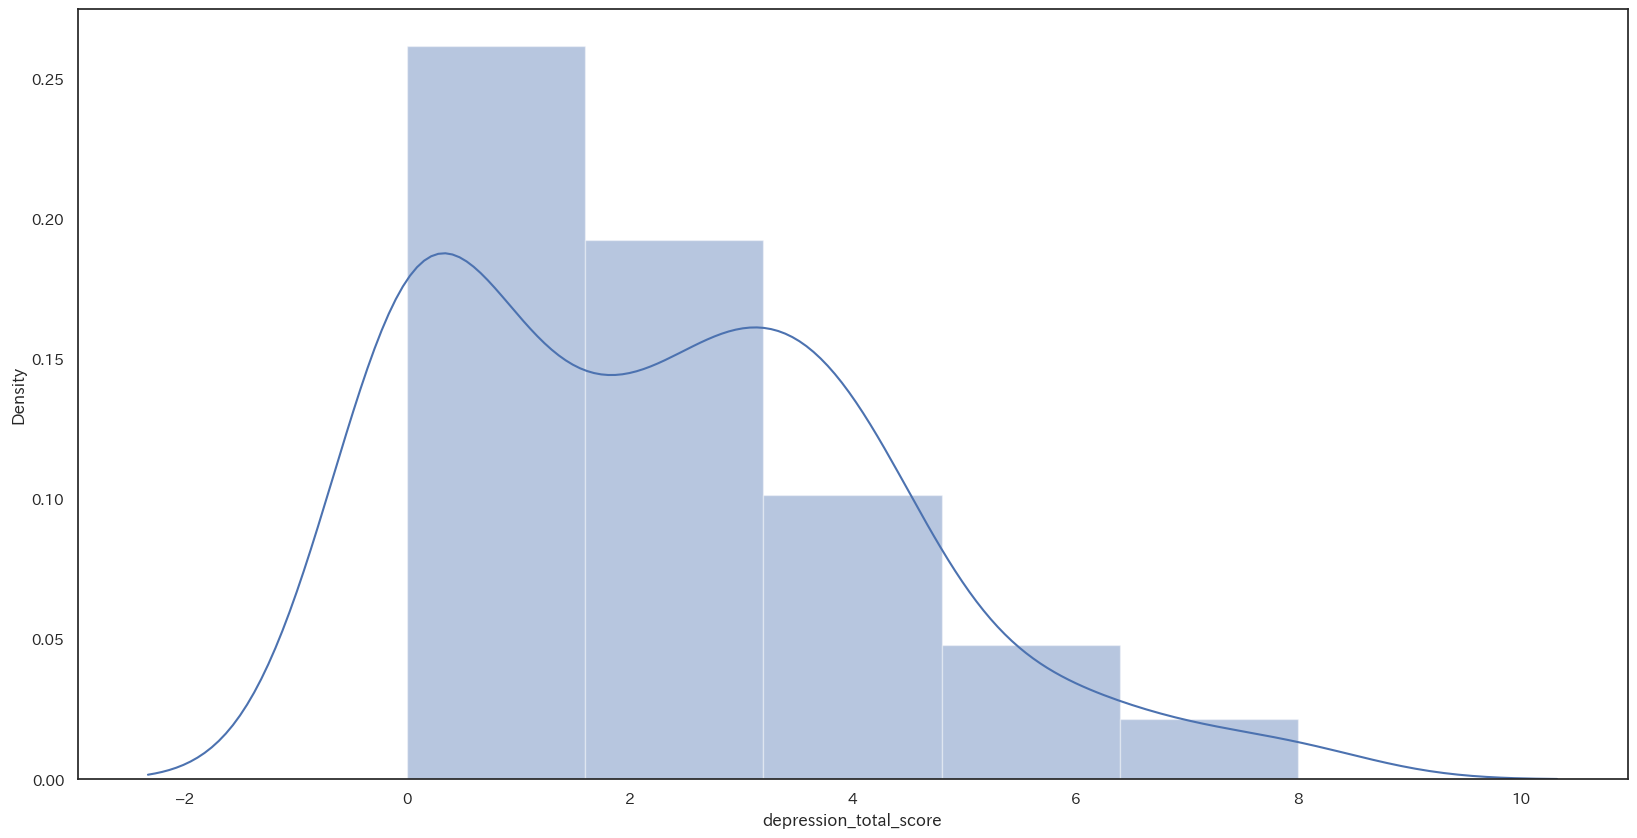

In [16]:
#depression_total_score
fig = plt.subplots(figsize=(20,10))
sns.distplot(df_master["depression_total_score"])
df_master["depression_total_score"].describe()

#何の検査のスコアか不明、0点が多いところをみても有名なGDSスコアでもなさそう
#点数が低い方がよさそうな印象
#よく分からないが、とりあえずそのまま使う

##前処理

In [17]:
df = df_master.copy()

#'index' 削除
df = df.drop("index", axis=1)

#'frail'  Frail=2, Pre-frail=1, Non frail=0で順序尺度に変換
df["frail"] = df["frail"].map({"Frail": 2,  "Pre-frail": 1, "Non frail": 0})

#'gender'  M=1,F=0にダミー変換
df["gender"] = df["gender"].map({"M": 1,  "F": 0})

#'age'  処理なし
#'hospitalization_one_year'  処理なし

#'ortho_hypotension'  Yes=1でダミー変換
df["ortho_hypotension"] = df["ortho_hypotension"].map({"Yes": 1,  "No": 0})

#'vision'　Sees well=2, Sees moderately=1, Sees poorly=0で順序尺度
df["vision"] = df["vision"].map({"Sees well": 2,  "Sees moderately": 1, "Sees poorly": 0})

#'audition'　Hears well=1, Hears moderately=0で順序尺度に変換できそう
df["audition"] = df["audition"].map({"Hears well": 1,  "Hears moderately": 0})

#'balance_single　>5 sec=2, <5 sec=1, test non realizable=0で順序尺度に変換
df["balance_single"] = df["balance_single"].map({">5 sec": 2,  "<5 sec": 1, "test non realizable": 0})

#'gait_speed_4m'　後で対数変換

#'bmi_score'　bmi<25 =0(正常), bmi>=25 =1(肥満1度), bmi>=30 =2(肥満2度) , bmi>=35 =2(肥満3度), bmi>=40 =4(肥満4度)の順序尺度に変換
df["bmi_score"] = (df["bmi_score"] // 5) - 4
df["bmi_score"] = df["bmi_score"].astype("int")

#'mmse_total_score'　処理なし
#'depression_total_score'　処理なし

#確認
display(df.head())
df.info()

,frail,gender,age,hospitalization_one_year,ortho_hypotension,vision,audition,balance_single,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
0,1,1,78,0,0,1,0,2,8.80,0,29,2
1,1,1,79,0,0,1,0,2,6.20,0,30,2
2,1,1,79,0,0,1,0,2,7.20,0,28,2
3,1,1,80,0,0,1,0,2,6.45,0,26,3
4,0,0,72,1,0,2,1,2,4.70,0,25,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   frail                     117 non-null    int64  
 1   gender                    117 non-null    int64  
 2   age                       117 non-null    int64  
 3   hospitalization_one_year  117 non-null    int64  
 4   ortho_hypotension         117 non-null    int64  
 5   vision                    117 non-null    int64  
 6   audition                  117 non-null    int64  
 7   balance_single            117 non-null    int64  
 8   gait_speed_4m             117 non-null    float64
 9   bmi_score                 117 non-null    int64  
 10  mmse_total_score          117 non-null    int64  
 11  depression_total_score    117 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 11.1 KB


In [18]:
#対数変換＋標準化
df_std = df.copy()
df_std["gait_speed_4m"] = np.log(df_std["gait_speed_4m"])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std = ss.fit_transform(df_std)
df_std = pd.DataFrame(df_std, columns=df.columns)
display(df_std.head())

,frail,gender,age,hospitalization_one_year,ortho_hypotension,vision,audition,balance_single,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
0,0.146224,0.863868,0.367728,-0.412927,-0.211289,-0.974292,-1.782855,0.801486,0.920270,-1.05509,0.618500,-0.128163
1,0.146224,0.863868,0.656480,-0.412927,-0.211289,-0.974292,-1.782855,0.801486,0.082641,-1.05509,1.282395,-0.128163
2,0.146224,0.863868,0.656480,-0.412927,-0.211289,-0.974292,-1.782855,0.801486,0.440297,-1.05509,-0.045395,-0.128163
3,0.146224,0.863868,0.945233,-0.412927,-0.211289,-0.974292,-1.782855,0.801486,0.177192,-1.05509,-1.373184,0.371673
4,-1.169795,-1.157584,-1.364787,1.312519,-0.211289,0.654167,0.560898,0.801486,-0.579868,-1.05509,-2.037078,-0.128163


##クラスター作成、検証、評価

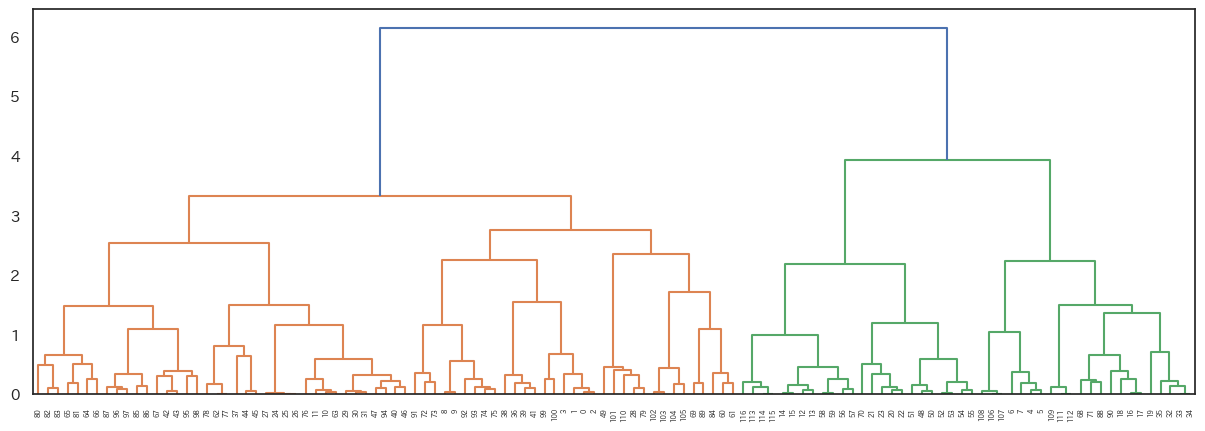

cluster_cosine
1    38
2    19
3    14
4    24
5    22
Name: age, dtype: int64

,frail,gender,age,hospitalization_one_year,ortho_hypotension,vision,audition,balance_single,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
cluster_cosine,,,,,,,,,,,,
1,0.473684,1.000000,77.763158,0.315789,0.000000,2.000000,1.000000,1.815789,5.446316,1.078947,28.763158,1.526316
2,0.842105,1.000000,76.157895,0.105263,0.000000,1.473684,0.210526,1.684211,5.357895,0.684211,28.368421,1.421053
3,0.785714,0.428571,78.571429,0.071429,0.357143,1.714286,0.785714,1.071429,5.449286,0.571429,28.500000,1.071429
4,1.625000,0.166667,77.750000,0.000000,0.000000,0.916667,0.625000,0.750000,11.303750,2.125000,26.458333,4.291667
5,0.909091,0.000000,73.136364,0.590909,0.000000,1.681818,0.954545,1.727273,5.372273,0.909091,28.090909,2.772727


In [19]:
#階層性クラスター分析(n数が少ないケースでは、非階層性よりも可視化できる階層性クラスターが向いている)
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
plt.figure(figsize=(15,5))
clusters = pdist(df_std,metric="cosine")
dendrogram = sch.dendrogram(sch.linkage(clusters, method="ward"))
plt.show()

df_cluster = df.copy()
df_cluster["cluster_cosine"]=sch.fcluster(sch.linkage(clusters,method="ward"),t=5,criterion="maxclust") #tはクラスター数
display(df_cluster.groupby("cluster_cosine").count()["age"])
df_cluster.groupby("cluster_cosine").mean()

**cluster1(やや肥満健康グループ)**:機能の高い男性、やや肥満傾向。  
▶肥満改善と今後の老化防止に向けた運動習慣作りなどが必要  
**cluster2(聴覚障害グループ)**:聴覚が悪い男性、聴覚以外の機能は比較的良好  
▶聴覚障害向け福祉サービスの指導などサポートが必要  
**cluster3(虚弱予備軍グループ)**:やや高齢で、身体機能も低下気味、まだ入院歴はないが今後注意が必要  
▶年齢が年齢なので、転倒予防教室など、今後の衰えを見越したサポートが必要  
**cluster4(要注意グループ)**:虚弱体質の女性、入院歴はないが身体機能、視聴覚、認知機能の低下やうつ、肥満など様々な懸念点が目立つ。あらゆる理由で今後入院するリスクが高い    
▶マメに訪問して様子をみたり、適切な福祉サービスを提案するなど、ケアが必要  
**cluster5(グループ)**:70代前半の若めの女性、年齢の割に入院歴がある点は注意が必要で、うつスコアが高いのも気になる  
▶︎入院歴に合わせたサポートやメンタルケアが必要か

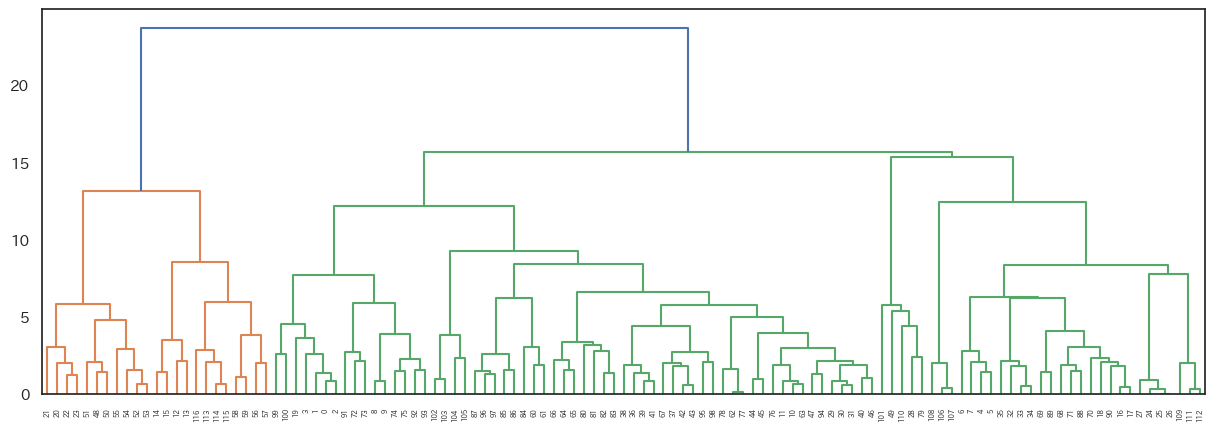

cluster_euclidean
1    11
2    12
3    61
4     5
5    28
Name: age, dtype: int64

,frail,gender,age,hospitalization_one_year,ortho_hypotension,vision,audition,balance_single,gait_speed_4m,bmi_score,mmse_total_score,depression_total_score
cluster_euclidean,,,,,,,,,,,,
1,1.272727,0.363636,75.545455,0.000000,0.0,0.363636,0.909091,1.090909,8.334545,1.000000,25.818182,4.636364
2,2.000000,0.000000,80.083333,0.000000,0.0,1.333333,0.333333,0.416667,14.492500,3.250000,27.000000,4.000000
3,0.672131,0.918033,78.032787,0.163934,0.0,1.803279,0.704918,1.639344,5.584426,0.852459,28.590164,1.262295
4,0.600000,0.600000,76.400000,0.200000,1.0,1.400000,0.800000,1.600000,4.688000,1.000000,27.800000,2.000000
5,0.785714,0.142857,72.964286,0.607143,0.0,1.785714,1.000000,1.678571,5.173214,0.928571,28.321429,2.785714


In [20]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
plt.figure(figsize=(15,5))
clusters = pdist(df_std,metric="euclidean") 
dendrogram = sch.dendrogram(sch.linkage(clusters, method="ward"))
plt.show()

df_cluster = df.copy()
df_cluster["cluster_euclidean"]=sch.fcluster(sch.linkage(clusters,method="ward"),t=5,criterion="maxclust") #tはクラスター数
display(df_cluster.groupby("cluster_euclidean").count()["age"])
df_cluster.groupby("cluster_euclidean").mean()

#ユークリッド距離の方がクラスター間の人数の偏りが大きい

**cluster1(やや注意グループ)**:やや虚弱気味、視覚障害があり、認知機能低下、うつスコアも高め。今のところ入院歴はないが、あらゆる障害が軽度にみられるため、今後注意が必要  
▶マメに訪問して、視覚障害のサポートや虚弱改善、メンタルケアを含めたトータルケアが必要  
**cluster2(要注意虚弱グループ)**:80歳前後の肥満女性、聴覚障害があり、身体機能の衰えや鬱傾向もみられる。一番注意が必要  
▶マメな訪問や、リハビリの提供など身体機能を中心としたサポートが必要  
**cluster3(元気グループ)**:一番人数が多いクラスター、70代後半男性、全体的に特に問題のない集団  
▶他のクラスターに比べて優先度は低いが、年齢は高めではあるので総合的な福祉サポートがあると良い  
**cluster4(起立性低血圧グループ)**:5人しかいないクラスター70代後半の起立性低血圧持ちの男女、他は問題なし  
▶起立性低血圧のサポートといってもあまり対策が思いつかないため、近似のcluster5に含めてしまっても良さそう  
**cluster5(若め元気グループ)**:70代前半の入院歴がある女性、入院歴以外身体機能に問題はない  
▶優先度は低いが入院歴に応じた病気の知識を知るセミナーなどはやっても良いか

**【結論】今回のケースでは、コサイン類似度で分けたクラスターの方が、施策に結び付けやすくグルーピングできていたので、コサイン類似度でクラスタリングを採用してもよさそう**